## Walmart sales projection
#### Prepared By: Mahmoud Mohamad 206157, Youssef Yasser 206447 and Ahmad Ibrahim 194401

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
# load data
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
train = pd.read_csv('train.csv')



## Stores.csv

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.shape

(45, 3)

In [5]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [6]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


## Features.csv

In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features.shape

(8190, 12)

In [9]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [10]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


## train.csv

In [11]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [12]:
train.shape

(421570, 5)

In [13]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [14]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## Data cleaning and tidying 

In [15]:
#merging the 3 dataframes with each other

stores = stores.merge(features, on = ['Store'], how = 'inner' )
df = train.merge(stores, on = ['Store','Date','IsHoliday'], how='inner')

In [16]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [17]:
# convert data type for Date from object to Date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [18]:
#dropping unnecessery columns
df.drop(['Size', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Type','Fuel_Price'], axis=1, inplace=True)

In [19]:
#we can see that there are negative values in weekly_sales.
#Since sales values can’t be negative, we skipped those rows having negative weekly sales

df = df[df['Weekly_Sales'] >= 0]

### New Columns

- Week = week of year extracted from Date
- Month = month extracted from Date
- Year = year extracted from Date
- Store_Weekly_Sales = Total sales of a store in a week 

In [20]:
#total sales by store and date

store_total_sales = df.groupby(['Store','Date'],as_index=False).agg(Store_Weekly_Sales=("Weekly_Sales", "sum"))

#we grouped by the store and date so we can get the total store sales on a certain date
#then by putting the result in the same data frame we delete the columns we dont need, which are weekly sales and department

store_sales = pd.merge(store_total_sales, df, how='inner', on=['Store', 'Date'])

In [21]:
store_sales.drop(['Dept','Weekly_Sales'],axis=1 , inplace=True)

In [22]:
#extracting the week, month and year from Date
store_sales['Week'] = store_sales['Date'].dt.isocalendar().week
store_sales['Month'] = store_sales['Date'].dt.month
store_sales['Year'] = store_sales['Date'].dt.year

In [23]:
#droping duplicates
store_sales.drop_duplicates(['Store','Date'],inplace=True)

In [24]:
#reindexing the data
store_sales.index=np.arange(start=1,stop=len(store_sales.index)+1)
print(store_sales.index)

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            6426, 6427, 6428, 6429, 6430, 6431, 6432, 6433, 6434, 6435],
           dtype='int64', length=6435)


In [25]:
#checking for null values
store_sales.isnull().sum()

Store                 0
Date                  0
Store_Weekly_Sales    0
IsHoliday             0
Temperature           0
CPI                   0
Unemployment          0
Week                  0
Month                 0
Year                  0
dtype: int64

In [26]:
store_sales

,Store,Date,Store_Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Week,Month,Year
1,1,2010-02-05,1643690.90,False,42.31,211.096358,8.106,5,2,2010
2,1,2010-02-12,1641957.44,True,38.51,211.242170,8.106,6,2,2010
3,1,2010-02-19,1612831.17,False,39.93,211.289143,8.106,7,2,2010
4,1,2010-02-26,1409727.59,False,46.63,211.319643,8.106,8,2,2010
5,1,2010-03-05,1554806.68,False,46.50,211.350143,8.106,9,3,2010
...,...,...,...,...,...,...,...,...,...,...
6431,45,2012-09-28,713173.95,False,64.88,192.013558,8.684,39,9,2012
6432,45,2012-10-05,733455.07,False,64.89,192.170412,8.667,40,10,2012
6433,45,2012-10-12,734464.36,False,54.47,192.327265,8.667,41,10,2012
6434,45,2012-10-19,718125.53,False,56.47,192.330854,8.667,42,10,2012


## Outliers

In [27]:
def boxplot(df_in, num_cols=2, figsize=(10, 8)):
    num_rows = math.ceil(len(df_in.columns) / num_cols)
    fig, axes = plt.subplots(figsize=figsize, nrows=num_rows, ncols=num_cols) 
    col = row = 0
    for col_name in df_in.columns:
        if num_rows == 1 and num_cols == 1:
            ax = axes
        elif num_rows == 1 and num_cols > 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        # draw boxplot
        _ = sns.boxplot(df_in[col_name], ax=ax, orient='v')
        ax.set_ylabel(col_name, fontsize=14)
        
        # set index for column and row
        col += 1
        if col == num_cols:
            col = 0        # reset column
            row = row + 1  # set to next row  
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)   
    plt.show()

G:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Software\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
G:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\Software\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

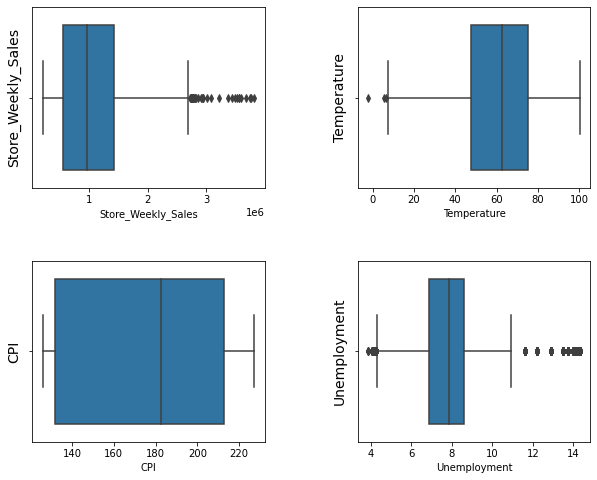

In [35]:
boxplot(store_sales.select_dtypes(include=['number']).drop(['Store','Year','Month','Week'], axis=1))

There are some values that seems to be outliers but there values also makes sense.
so we can say that there is no outliers.

## Data Visualization and Interpretation

### Q1 : Is there a relation between the cpi and the store weekly sales?

In [29]:
def scatter(store_sales, column):
    plt.figure(figsize=(12,6))
    plt.scatter(store_sales[column] , store_sales['Store_Weekly_Sales'])
    plt.ylabel('Store Weekly Sales')
    plt.xlabel(column)

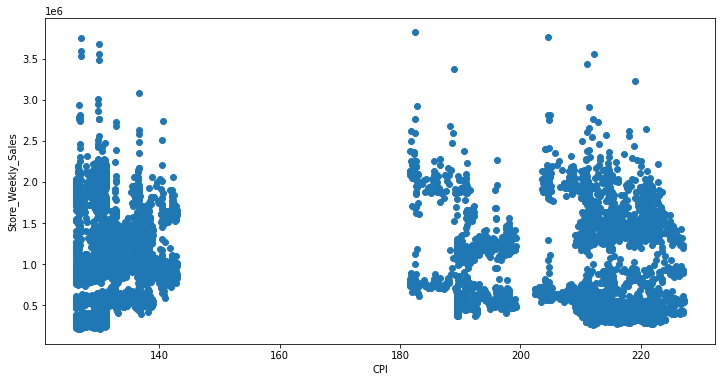

In [30]:
scatter(store_sales, 'CPI') 

No, There are 3 clear clusters but there is no any clear relation between CPI and weekly sales

### Q2 : Does the increase in temperature results in an increase in store weekly sales?

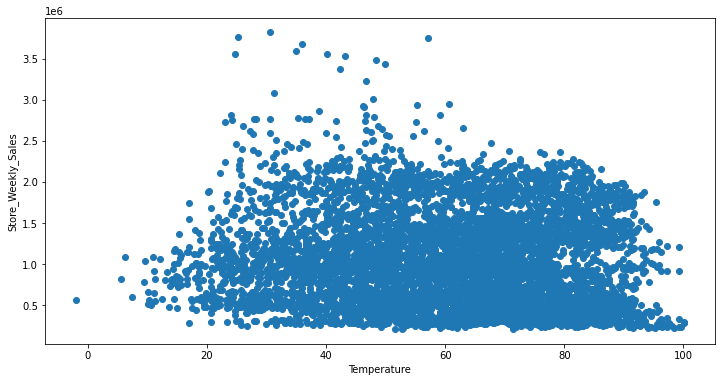

In [31]:
scatter(store_sales, 'Temperature')

No, There are no clear relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to drop a bit but in general the temperature doesn't seem to affect the weekly sales of the stores.

### Q3 : Does the increase in unemployment rate results in an increase in store weekly sales?

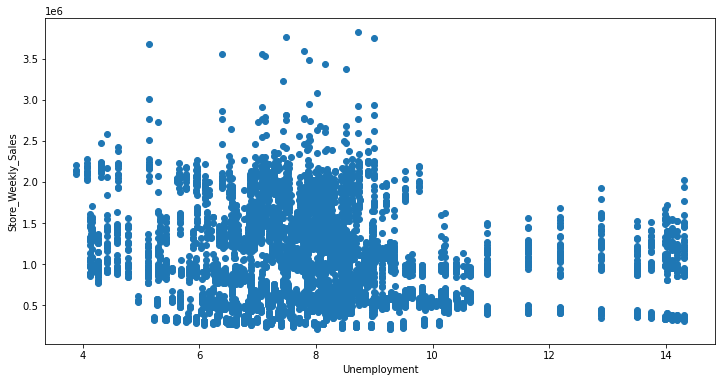

In [32]:
scatter(store_sales, 'Unemployment') 

 As we can see at high unemployment rate the stores weekly sales drops down alot, but it doesn't seem to have a correlation on the stores weekly sales in general.

### Q4 : Are the weekly sales affected by holidays?

<AxesSubplot:xlabel='IsHoliday', ylabel='Store_Weekly_Sales'>

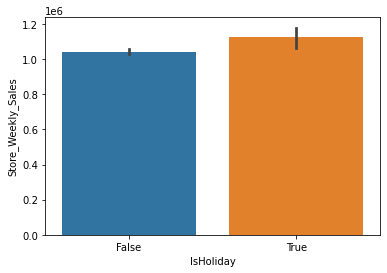

In [33]:
holiday = store_sales['Store_Weekly_Sales'].loc[store_sales['IsHoliday']== True] 
non_holiday = store_sales['Store_Weekly_Sales'].loc[store_sales['IsHoliday']== False]
sns.barplot(x='IsHoliday', y='Store_Weekly_Sales', data=store_sales)

As we can see, Week Holidays have slightly more higher sales than non-Holiday Weeks.